In [1]:
#pip install keras

In [2]:
#pip install tensorflow

In [3]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
K.set_image_data_format('channels_last')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [4]:
PATH = os.getcwd()
# Define data path
data_path = 'F:/data'
data_dir_list = os.listdir(data_path)
data_dir_list

['bike', 'cars']

In [5]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=50
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-bike

Loaded the images of dataset-cars

(547, 128, 128)


In [6]:
if num_channel==1:
    if K.image_data_format() == 'channels_first':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3) 
        print (img_data.shape)

else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)
        
        
        
        
        


(547, 128, 128, 1)


In [7]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [8]:
Y = np_utils.to_categorical(labels, num_classes)

In [9]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [10]:

print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (437, 128, 128, 1)
X_test shape = (110, 128, 128, 1)


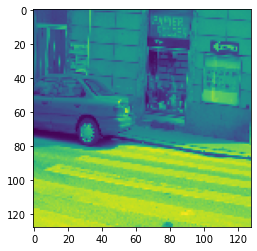

In [11]:
image = X_train[403,:].reshape((128,128))
plt.imshow(image)
plt.show()

 Designing and training a CNN model in Keras

In [12]:
#Initialising the input shape
input_shape=img_data[0].shape
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(32,3,3,input_shape = input_shape,padding='same',activation='relu'),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation = 'softmax')
])

In [13]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               200832    
                                                        

In [15]:
hist = cnn_model.fit(X_train, y_train, batch_size=10, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

Epoch 1/50
44/44 [==============================] - 5s 49ms/step - loss: 1.8417 - accuracy: 0.3638 - val_loss: 1.8459 - val_accuracy: 0.7000
Epoch 2/50
44/44 [==============================] - 2s 41ms/step - loss: 1.8366 - accuracy: 0.3959 - val_loss: 1.8378 - val_accuracy: 0.7091
Epoch 3/50
44/44 [==============================] - 2s 39ms/step - loss: 1.8297 - accuracy: 0.3799 - val_loss: 1.8298 - val_accuracy: 0.7091
Epoch 4/50
44/44 [==============================] - 2s 41ms/step - loss: 1.8234 - accuracy: 0.4279 - val_loss: 1.8215 - val_accuracy: 0.7091
Epoch 5/50
44/44 [==============================] - 2s 42ms/step - loss: 1.8114 - accuracy: 0.4348 - val_loss: 1.8132 - val_accuracy: 0.7091
Epoch 6/50
44/44 [==============================] - 2s 41ms/step - loss: 1.8098 - accuracy: 0.4508 - val_loss: 1.8047 - val_accuracy: 0.7091
Epoch 7/50
44/44 [==============================] - 2s 40ms/step - loss: 1.7995 - accuracy: 0.4302 - val_loss: 1.7963 - val_accuracy: 0.7091
Epoch 8/50
44

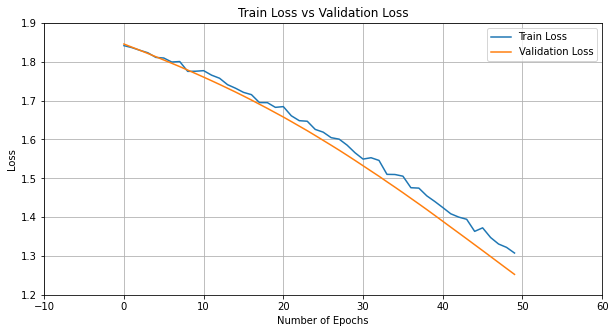

In [16]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

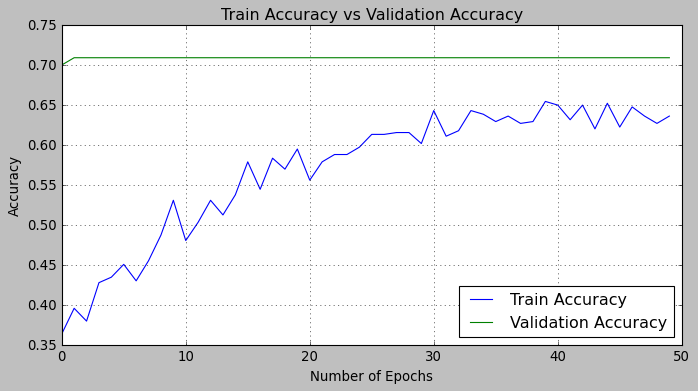

In [17]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [18]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.2525815963745117
Test Accuracy: 0.7090908885002136


In [19]:
test_image = X_test[0:1]
print (test_image.shape)
print(cnn_model.predict(test_image))
print(np.argmax(cnn_model.predict(test_image), axis=1))
print(y_test[0:1])

(1, 128, 128, 1)
1/1 [==============================] - 0s 251ms/step
[[0.3614753  0.22808075 0.09097196 0.1159476  0.06828115 0.06012712
  0.07511617]]
1/1 [==============================] - 0s 62ms/step
[0]
[[1. 0. 0. 0. 0. 0. 0.]]


In [20]:

test_img = cv2.imread('F:/data/bike/bike_001.bmp')
if test_img is None:
    print('Error: Image not found!')
else:
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

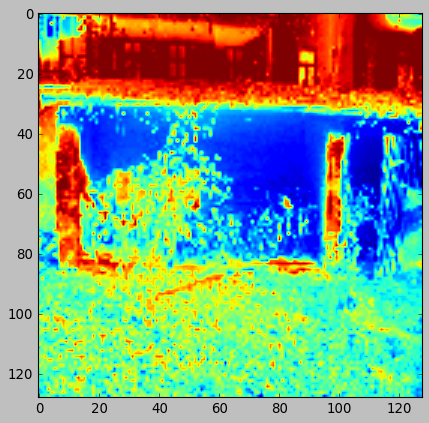

In [21]:
test_img_resize = cv2.resize(test_img,(128,128))
image = test_img_resize.reshape((128,128))
plt.imshow(image)
plt.show()

    